# 1. LOFO binary classification

ref: https://github.com/aerdem4/lofo-importance

In [67]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer, load_iris
from sklearn.model_selection import KFold
from lofo import LOFOImportance, Dataset, plot_importance

In [87]:
#data

data = load_breast_cancer(as_frame=True)# load as dataframe
df = data.data
df['target']=data.target.values
print(df.shape)# (569, 31)

(569, 31)


In [79]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [80]:
df['target']

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: target, Length: 569, dtype: int64

In [81]:
# model
model = RandomForestClassifier()

In [82]:
# dataset
##dataset = Dataset(df=df, target="target", features=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal length (cm)'])
dataset = Dataset(df=df, target="target", features=[col for col in df.columns if col != 'target'])


In [83]:
# get feature importance

cv = KFold(n_splits=5, shuffle=True, random_state=666)
lofo_imp = LOFOImportance(dataset, cv=cv, scoring="f1",model=model)# f1_macro
importance_df = lofo_imp.get_importance()

In [92]:
importance_df

,feature,importance_mean,importance_std,val_imp_0,val_imp_1,val_imp_2,val_imp_3,val_imp_4
26,area error,0.010495,0.015150,0.026316,0.017544,0.017544,0.008772,-0.017699
23,worst perimeter,0.008787,0.012405,0.017544,0.000000,-0.008772,0.026316,0.008850
29,mean smoothness,0.007049,0.008633,-0.008772,0.008772,0.008772,0.008772,0.017699
24,mean texture,0.007049,0.017029,-0.008772,0.035088,0.000000,-0.008772,0.017699
1,mean radius,0.005279,0.007025,0.000000,0.017544,0.000000,0.000000,0.008850
16,mean compactness,0.003555,0.014327,0.000000,0.000000,0.008772,-0.017544,0.026549
4,perimeter error,0.003524,0.010534,-0.008772,0.017544,-0.008772,0.008772,0.008850
6,worst smoothness,0.003493,0.008967,0.017544,0.008772,0.000000,0.000000,-0.008850
20,worst texture,0.003478,0.011954,0.017544,0.008772,0.000000,0.008772,-0.017699
21,symmetry error,0.001770,0.006581,0.000000,0.008772,0.000000,-0.008772,0.008850


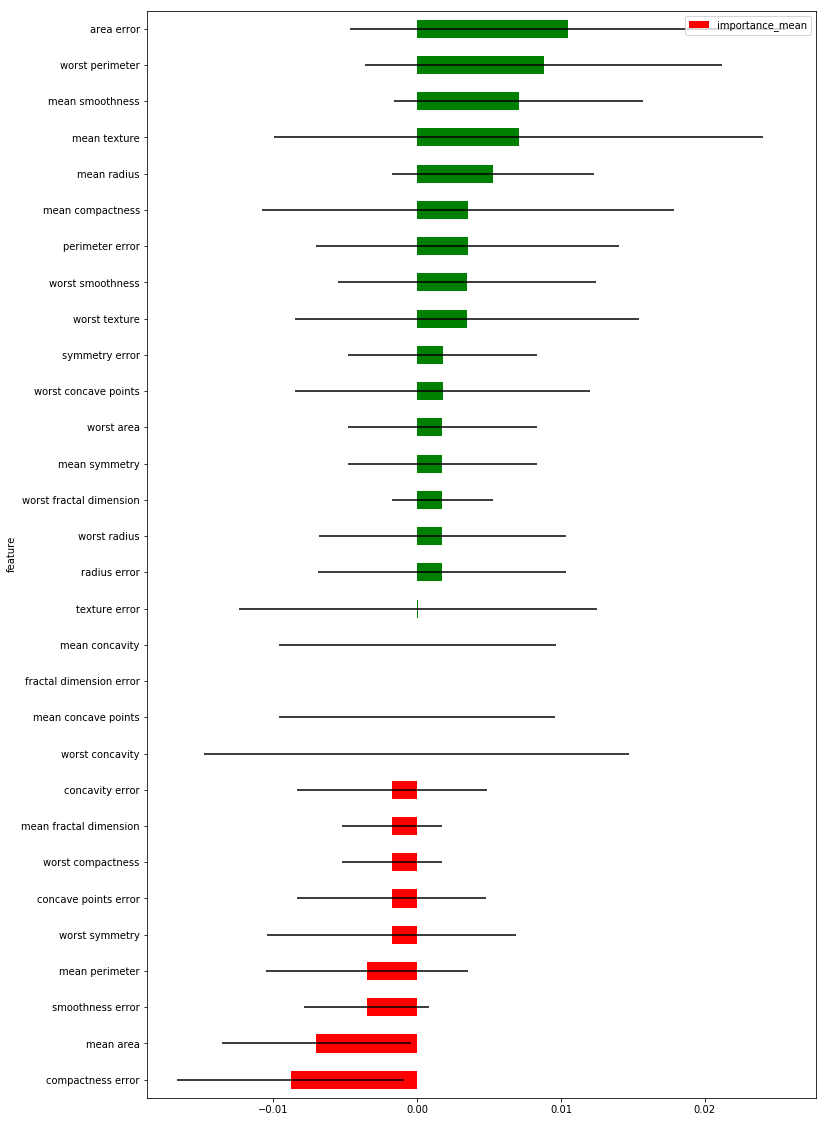

In [93]:
%matplotlib inline


p = plot_importance(importance_df, figsize=(12, 20))

# 2. LOFO multiclass classification

In [121]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer, load_iris
from sklearn.model_selection import KFold
from lofo import LOFOImportance, Dataset, plot_importance

data = load_iris(as_frame=True)# load as dataframe
df = data.data
df['target']=data.target.values

# model
model = RandomForestClassifier()
# dataset
dataset = Dataset(df=df, target="target", features=[col for col in df.columns if col != 'target'])
# get feature importance
cv = KFold(n_splits=5, shuffle=True, random_state=666)
lofo_imp = LOFOImportance(dataset, cv=cv, scoring="f1_macro",model=model)
importance_df = lofo_imp.get_importance()
print(importance_df)



             feature  importance_mean  importance_std  val_imp_0  val_imp_1  \
3   petal width (cm)         0.033886        0.030132        0.0   0.036715   
0  sepal length (cm)         0.005760        0.025790        0.0   0.036715   
1   sepal width (cm)         0.000000        0.000000        0.0   0.000000   
2  petal length (cm)        -0.001620        0.038810        0.0   0.036715   

   val_imp_2  val_imp_3  val_imp_4  
3   0.074303   0.058413        0.0  
0  -0.036455   0.028543        0.0  
1   0.000000   0.000000        0.0  
2  -0.073360   0.028543        0.0  


# 3. Fast LOFO

In [122]:
from lofo import FLOFOImportance
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer, load_iris
from sklearn.model_selection import KFold
from lofo import LOFOImportance, Dataset, plot_importance
# step-01: prepare data
data = load_iris(as_frame=True)# load as dataframe
x_data = data.data.to_numpy()
y_data = data.target.values
df = data.data
df['target']=data.target.values
# repeat more data since FLOFO need > 1000 data
df=pd.DataFrame(pd.np.repeat(df.values,10,axis=0),columns=df.columns)
# step-02: train model
model = RandomForestClassifier()
model.fit(x_data,y_data)
# step-03: fast-lofo
lofo_imp = FLOFOImportance(validation_df=df, target="target", features=[col for col in df.columns if col != 'target'],scoring="f1_macro",trained_model=model)
importance_df = lofo_imp.get_importance()
print(importance_df)

/home/mtrt_service/anaconda3/envs/env_ml6_py37/lib/python3.7/site-packages/ipykernel_launcher.py:14: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  



             feature  importance_mean  importance_std  val_imp_0  val_imp_1  \
3   petal width (cm)         0.060438        0.020450   0.076176   0.083605   
2  petal length (cm)         0.059855        0.018743   0.059404   0.062765   
1   sepal width (cm)         0.014067        0.002973   0.014001   0.012667   
0  sepal length (cm)         0.009934        0.003091   0.012668   0.008668   

   val_imp_2  val_imp_3  val_imp_4  val_imp_5  val_imp_6  val_imp_7  \
3   0.041334   0.040667   0.040001   0.033333   0.082152   0.080234   
2   0.033337   0.085642   0.044674   0.055415   0.038674   0.048072   
1   0.016001   0.013334   0.014667   0.015334   0.018667   0.006667   
0   0.008668   0.006667   0.013334   0.008000   0.012667   0.006000   

   val_imp_8  val_imp_9  
3   0.046000   0.080877  
2   0.086939   0.083624  
1   0.013334   0.016001  
0   0.007333   0.015335  
